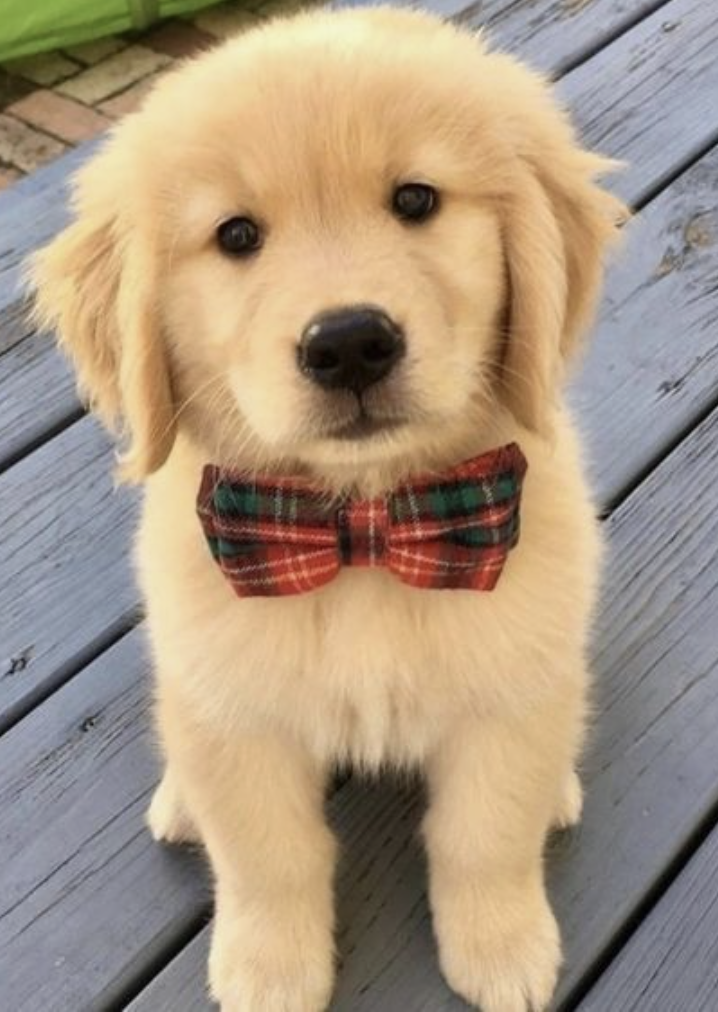

# Problem statement:
## Build a dog breed classifier that beats baseline accuracy (1/120 ~ 0.8%) from an untrained model and a pretrained network. Stretch goal, build streamlit app to allow user to enter photos.
Training data from http://vision.stanford.edu/aditya86/ImageNetDogs/

In [1]:
import numpy as np
import os
import cv2
# from imageio.v2 import imread
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split



from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import Input
from tensorflow.keras.regularizers import l2

# Reading in images

In [2]:
root = 'datasets/Images'
files = os.listdir(root)
len(files)

121

In [3]:
1/120

0.008333333333333333

In [15]:
dog_nums = []

In [16]:
images = []
for file in files:
    if file[0] == '.': # to get rid of hidden files
        continue
    dog_type = file.split('-')[1]
    dogs = os.listdir(root +'/' +file)
    dogs = [(root+'/'+file+'/'+dog, dog_type) for dog in dogs if dog[0]!='.']
    images += dogs
    dog_nums.append(len(dogs))

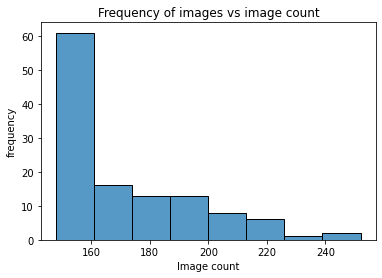

In [20]:
fig, ax = plt.subplots()
sns.histplot(dog_nums)
ax.set(title = 'Frequency of images vs image count', xlabel = 'Image count', ylabel = 'frequency');

In [11]:
images[:3]

[('datasets/Images/n02097658-silky_terrier/n02097658_26.jpg', 'silky_terrier'),
 ('datasets/Images/n02097658-silky_terrier/n02097658_4869.jpg',
  'silky_terrier'),
 ('datasets/Images/n02097658-silky_terrier/n02097658_595.jpg',
  'silky_terrier')]

In [9]:
# heights = []
# widths = []
# colors = []
# for image in images:
#     im = image[0]

#     vectorized_picture = np.array(imread(im))
#     heights.append(vectorized_picture.shape[0])
#     widths.append(vectorized_picture.shape[1])
#     colors.append(vectorized_picture.shape[2])
    

## Checking ranges of values of heights/widths and verifying all color images (3) values

In [13]:
# min(heights), np.mean(heights), max(heights)

In [11]:
min(widths), np.mean(widths), max(widths)

(97, 442.5318756073858, 3264)

In [12]:
min(colors), max(colors)

(3, 4)

In [13]:
[1 for color in colors if color==4 ] # one image with transparency data

[1]

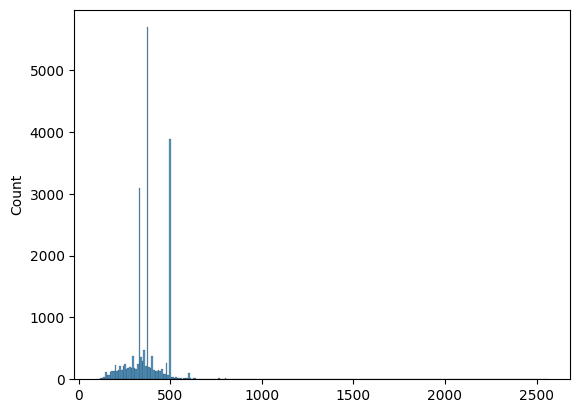

In [14]:
sns.histplot(heights);

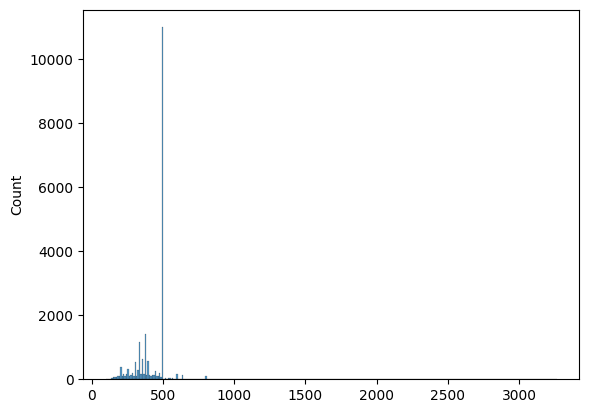

In [15]:
sns.histplot(widths);

In [5]:
dog_df = pd.DataFrame({'image_url': [image[0] for image in images], 'breed': [image[1] for image in images]})

In [6]:
X = [cv2.imread(image[0], cv2.IMREAD_COLOR) for image in images]

In [7]:
del images

In [8]:
# dim = (round(np.mean(widths)), round(np.mean(heights)))
dim = (443, 386) # kernel crashed
# resize image
X = [np.array(cv2.resize(img, dim, interpolation = cv2.INTER_NEAREST)).astype('float32')/255 for img in X]

In [9]:
# np.unique([x.shape for x in X_resized])
vals,counts = np.unique([x.shape for x in X], return_counts=True)
index = np.argmax(counts)
vals, counts

(array([  3, 386, 443]), array([20580, 20580, 20580]))

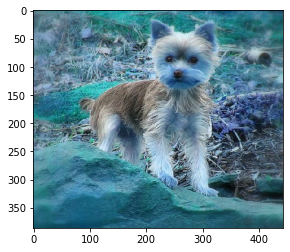

In [10]:
plt.imshow(X[20000]);

In [11]:
y = dog_df['breed']

In [12]:
y[20000]

'Yorkshire_terrier'